In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [2]:
img = image.load_img(r"C:\Users\hp\Desktop\training\happy\happy13.jpg")

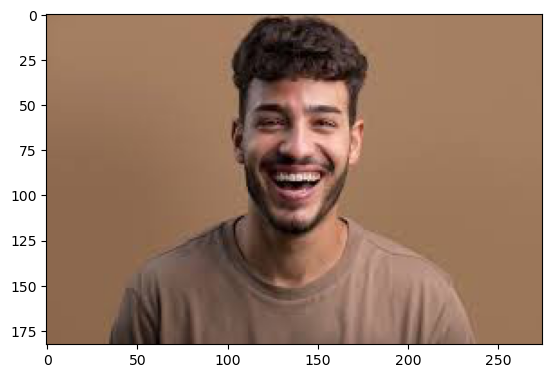

In [3]:
plt.imshow(img)

In [4]:
i1=cv2.imread(r"C:\Users\hp\Desktop\training\happy\happy13.jpg")
i1

array([[[ 93, 122, 159],
        [ 93, 122, 159],
        [ 94, 123, 160],
        ...,
        [ 98, 127, 164],
        [ 98, 127, 164],
        [ 98, 127, 164]],

       [[ 93, 122, 159],
        [ 94, 123, 160],
        [ 94, 123, 160],
        ...,
        [ 98, 127, 164],
        [ 98, 127, 164],
        [ 98, 127, 164]],

       [[ 94, 123, 160],
        [ 94, 123, 160],
        [ 94, 123, 160],
        ...,
        [ 98, 127, 164],
        [ 98, 127, 164],
        [ 98, 127, 164]],

       ...,

       [[ 76, 102, 138],
        [ 76, 102, 138],
        [ 76, 102, 138],
        ...,
        [ 88, 117, 154],
        [ 88, 117, 154],
        [ 88, 117, 154]],

       [[ 76, 102, 138],
        [ 76, 102, 138],
        [ 76, 102, 138],
        ...,
        [ 88, 117, 154],
        [ 88, 117, 154],
        [ 88, 117, 154]],

       [[ 76, 102, 138],
        [ 76, 102, 138],
        [ 76, 102, 138],
        ...,
        [ 88, 117, 154],
        [ 88, 117, 154],
        [ 88, 117, 154]]

In [5]:
i1.shape

(183, 275, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory(r"C:\Users\hp\Desktop\training",
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validation.flow_from_directory(r"C:\Users\hp\Desktop\validation",
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 40 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

c:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ['accuracy']
              )

In [17]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validataion_dataset)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8704 - loss: 0.6139

ValueError: The PyDataset has length 0

In [18]:
dir_path = r'C:\Users\kdata\Desktop\KODI WORK\0. DATASCIENCE PROJECT\19. CNN - Happy  or Sad\testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\kdata\\Desktop\\KODI WORK\\0. DATASCIENCE PROJECT\\19. CNN - Happy  or Sad\\testing'

In [19]:
dir_path = r'C:\Users\kdata\Desktop\KODI WORK\0. DATASCIENCE PROJECT\19. CNN - Happy  or Sad\testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\kdata\\Desktop\\KODI WORK\\0. DATASCIENCE PROJECT\\19. CNN - Happy  or Sad\\testing'

In [20]:
dir_path = r'C:\Users\kdata\Desktop\KODI WORK\0. DATASCIENCE PROJECT\19. CNN - Happy  or Sad\testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am not happy')
    else:
        print('i am happy')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\kdata\\Desktop\\KODI WORK\\0. DATASCIENCE PROJECT\\19. CNN - Happy  or Sad\\testing'